In [1]:
# imports 
%matplotlib inline

from IPython.display import YouTubeVideo
from IPython.display import Math

import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

import numpy as np
import numpy.random as rng

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [2]:
# diabetes_data
diabetes_data = datasets.load_diabetes()
print(diabetes_data.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

## Generating random data

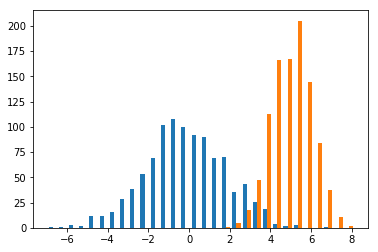

In [3]:
# get 1000x2 random samples from a normal (gaussian) distribution
# These have mean = 0, and variance = 1
x_normal = rng.randn(1000,2) 

# You can change the variance with multiplication
# now, the first column has variance 2
x_normal[:,0] = x_normal[:,0] * 2

# You can change the mean with addition
# now, the second column as mean 5
x_normal[:,1] = x_normal[:,1] + 5

# lets plot a histogram of both columns
# notice that it is smart about separating the two colums into different histograms
plt.hist( x_normal, bins=30 );

# Try another distribution
Look at [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) for numpy and try generating random data from a different distribution.
* What are the parameters of the distribution you chose?

# Matrix

## Build a matrix

In [4]:
a_list = [2, 3]
another_list = [4, 5]
a_list_of_lists = [a_list, another_list]
print( a_list_of_lists )
print( ' ' )

a_matrix = np.array(a_list_of_lists)
print( a_matrix )
print( ' ' )

a_vector = np.array( [[-0.5], [10]]) # write it like this so it's a column vector
print( a_vector )

[[2, 3], [4, 5]]
 
[[2 3]
 [4 5]]
 
[[ -0.5]
 [ 10. ]]


## Matrix-vector multiply

In [5]:
M_times_v = np.matmul( a_matrix, a_vector )
print( M_times_v )
print( ' ' )

# Another way to write this - see that the result is the same
print( a_matrix @ a_vector ) 

[[ 29.]
 [ 48.]]
 
[[ 29.]
 [ 48.]]


# Don't ever solve a linear system with an inverse matrix
* Seriously, you promised

The code below solves a linear system in two different ways, first by computing the matrix inverse then multiplying.  Then using a smart way `np.linalg.solve`) 

In [13]:
import time

# Try making it bigger than 2000, if you dare 
# (maybe stay under 10k)

medium_mtx = np.array( rng.rand( 4000, 4000 ) )
medium_vec = np.array( rng.rand( 4000, 1 ) )

# Solve by computing the matrix inverse, then multiplying
# See how long it takes
t0 = time.time()
slow_result = np.linalg.inv( medium_mtx ) @ medium_vec
t1 = time.time()
print( 'it took {} s the slow way'.format( t1-t0 ))

# Solve in a smart way
# See how long it takes
t0_f = time.time()
fast_result = np.linalg.solve( medium_mtx, medium_vec )
t1_f = time.time()
print( 'it took {} s the fast way'.format( t1_f - t0_f ))

# Check that the results are the same
# Subtract the results and see if any of the elements are bigger than a tiny number
print( 'are the results different? : {}'.format( np.any( ( slow_result - fast_result ) > 1e-6 )))

it took 6.21192193031311 s the slow way
it took 1.9188358783721924 s the fast way
are the results different? : False


## Bonus

Learn about [Toeplitz](https://en.wikipedia.org/wiki/Toeplitz_matrix) matrices. Notices there's a [special way to solve them](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_toeplitz.html#scipy.linalg.solve_toeplitz).  Try it - see how the speed compares to solving the random matrix above